In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import BatchNormalization

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
twitter_df = pd.read_csv("/content/twitter_parsed_dataset.csv")
twitter_df.head()

In [ ]:
twitter_r = pd.read_csv("/content/twitter_racism_parsed_dataset.csv")
twitter_r.shape

(13471, 5)

In [ ]:
twitter_s = pd.read_csv("/content/twitter_sexism_parsed_dataset.csv")
twitter_s.shape

(14881, 5)

In [ ]:
twitter_r.head()

,index,id,Text,Annotation,oh_label
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0


In [ ]:
twitter_s.head()

,index,id,Text,Annotation,oh_label
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1.0
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0.0
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0.0
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0.0
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1.0


In [ ]:
twitter_df.shape

(7032, 5)

In [ ]:
combined_df = pd.concat([twitter_df,twitter_s,twitter_r],axis=0)
combined_df.reset_index(drop=True)

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0
...,...,...,...,...,...
35379,575596397409406976.0,575596397409406976.0,#mkr NOOOOO!!! I wanted Kat and Andre to lose!!!,none,0.0
35380,558063078655672000.0,558063078655672000.0,RT @MumtazCeltik: @WhiteHouse @VP \n\n#Kobane ...,none,0.0
35381,575596856006177024.0,575596856006177024.0,Glad the proper competition is starting and ev...,none,0.0
35382,575599046066220992.0,575599046066220992.0,"No worries Pete and Manu, take all the time of...",none,0.0


In [ ]:
combined_df.shape

(35384, 5)

In [ ]:
combined_df.drop(['index','id','Annotation'],axis=1,inplace=True)

In [ ]:
combined_df.head()

,Text,oh_label
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0
1,@ShreyaBafna3 Now you idiots claim that people...,0.0
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0
4,#mkr No No No No No No,0.0


In [ ]:
twitter_df.isnull().sum()

Text        1
oh_label    3
dtype: int64

In [ ]:
twitter_df.dropna(inplace=True)

<Axes: >

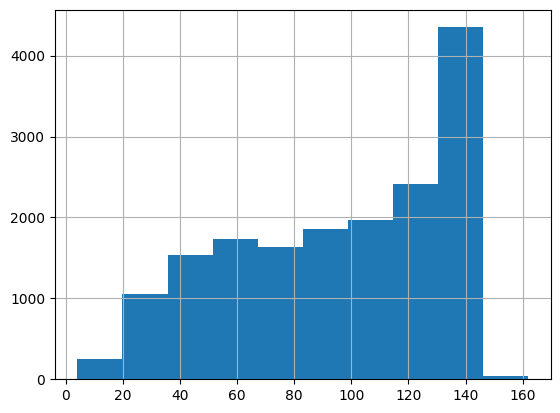

In [ ]:
# histogram of the number of characters in the text
twitter_df['Text'].str.len().hist()

In [ ]:
twitter_df.head()

,Text,oh_label
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0
1,@ShreyaBafna3 Now you idiots claim that people...,0.0
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0
4,#mkr No No No No No No,0.0


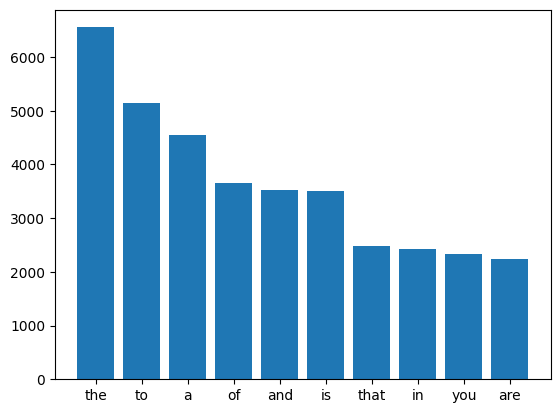

In [ ]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)
plot_top_stopwords_barchart(twitter_df['Text'])

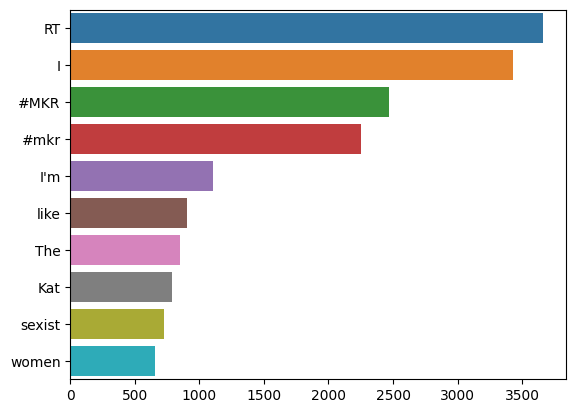

In [ ]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)
plot_top_non_stopwords_barchart(twitter_df['Text'])

In [ ]:
combined_df.isnull().sum().sum()

9

In [ ]:
combined_df.dropna(inplace=True)

In [ ]:
import spacy
import re
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Lowering down the text
    text = text.lower()

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Tokenization and lemmatization using spaCy
    doc = nlp(text)
    words = [token.lemma_ for token in doc]

    # Additional stopwords including 'mkr'
    custom_stopwords = set(['rt', '#mkr', "i'm", 'mkr'] + list(nlp.Defaults.stop_words))

    # Removing stopwords
    words = [word for word in words if word not in custom_stopwords]

    # Removing words starting with '@'
    words = [word for word in words if not word.startswith('@')]

    # Removing punctuation and special characters
    words = [word for word in words if word.isalnum()]

    # Join the words back into a string
    processed_text = ' '.join(words)

    return processed_text


In [ ]:
combined_df['Preprocessed_data'] = combined_df['Text'].apply(preprocess_text)

In [ ]:
combined_df.shape

(35377, 3)

In [ ]:
combined_df.to_csv("combined_tweet_data_and_preprocessed.csv")

In [ ]:
twitter_df.drop('Text',axis=1,inplace=True)

In [ ]:
# Tokenization using spaCy
preprocessed_data = twitter_df['Preprocessed_data']
tokenized_data = [word_tokenize(text) for text in preprocessed_data]

In [ ]:
combined_df.dropna(inplace=True)

In [ ]:
combined_df.dtypes

Text                  object
oh_label             float64
Preprocessed_data     object
dtype: object

In [ ]:
combined_df['oh_label'] = combined_df['oh_label'].astype(int)

In [ ]:
combined_df.head()

,Text,oh_label,Preprocessed_data
0,@halalflaws @biebervalue @greenlinerzjm I read...,0,I read change meaning history islamic slavery
1,@ShreyaBafna3 Now you idiots claim that people...,0,idiot claim people try stop terrorist terroris...
2,"RT @Mooseoftorment Call me sexist, but when I ...",1,I sexist I auto place I talk guy
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1,wrong isis follow example mohammed quran exactly
4,#mkr No No No No No No,0,


In [ ]:
preprocessed_data = combined_df['Preprocessed_data']
tokenized_data = [word_tokenize(text) for text in preprocessed_data]

In [ ]:
# Train Word2Vec model
from gensim.models import Word2Vec
model = Word2Vec(sentences=tokenized_data, vector_size=200, window=5, min_count=1, workers=4)

# Save the model to a file
model.save("word2vec_model")

In [ ]:
# loading the word 2 vec model
word2vec_model = Word2Vec.load("/content/word2vec_model")

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = combined_df['Preprocessed_data'].tolist()

# Tokenizing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences to the same length
max_seq_length = max(len(sequence) for sequence in sequences)
X = pad_sequences(sequences, maxlen=max_seq_length)

y = combined_df['oh_label'].values

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = word2vec_model.vector_size

# creating the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
  if word in word2vec_model.wv:
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
# Defining the LSTM Model with Pre-Trained Embeddings
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_seq_length, weights=[embedding_matrix], trainable=True))
model.add(LSTM(16))
model.add(Dropout(0.5))  # Increased dropout  # Increased dropout
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 200)           2553200   
                                                                 
 lstm (LSTM)                 (None, 16)                13888     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 batch_normalization (Batch  (None, 16)                64        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 2567169 (9.79 MB)
Trainable params: 2567137 (9.79 MB)
Non-trainable params: 32 (128.00 Byte)
_______________

In [ ]:
# Splitting of the data into train, val and test set
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=4)

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=20,         # Number of epochs with no improvement
    mode='min',         # Stop training when the quantity monitored stops decreasing
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

history = model.fit(
    X_train, y_train,
    batch_size=32,  # Adjust the batch size according to your data
    epochs=50,  # Adjust the number of epochs based on the training performance
    validation_data=(X_val, y_val),  # Use your validation data here
    callbacks=[early_stopping],
     class_weight=class_weights_dict
)

In [ ]:
model.save('my_lstm_model.h5_nd_try')

from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/my_lstm_model.h5_2nd_try')

loss, accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}%")


KeyboardInterrupt: ignored

In [ ]:
sentence = ['isis try stop people flee talabyad gre spi lie tht thy capture voice hit near']
sequence = tokenizer.texts_to_sequences([sentence])

#Pad the sequence
padded_sequence = pad_sequences(sequence, maxlen=max_seq_length)
prediction = model.predict(padded_sequence)
predicted_label = int(prediction > 0.5)  # Returns 1 if prediction > 0.5 else 0
print(predicted_label)

# **Keras Tuner**

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam
def build_model(hp):
  model = Sequential()
  model.add(Embedding(vocab_size, embedding_dim, input_length=max_seq_length, weights=[embedding_matrix], trainable=True))
  # Tune the number of units in the first layer
  hp_units = hp.Int('units', min_value=8, max_value=64, step=8)

  model.add(LSTM(units=hp_units))
  model.add(BatchNormalization())
  model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

  return model

<ipython-input-18-b0bacb0c95a0>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=4)

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=20,         # Number of epochs with no improvement
    mode='min',         # Stop training when the quantity monitored stops decreasing
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Adjust as needed
    directory='/content',
    project_name='lstm_tuning2'
)

# Perform the hyperparameter search
tuner.search(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    class_weight=class_weights_dict,
    batch_size=32
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the final model using the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)

Reloading Tuner from /content/lstm_tuning2/tuner0.json


In [ ]:
print(class_weights_dict)

{0: 0.66473575622917, 1: 2.017581888246628}


In [ ]:
# Train the final model
final_model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    class_weight=class_weights_dict,
    batch_size=32
)

Epoch 1/100
786/786 [==============================] - 9s 12ms/step - loss: 0.2884 - accuracy: 0.8856 - val_loss: 0.3655 - val_accuracy: 0.8485
Epoch 2/100
786/786 [==============================] - 7s 8ms/step - loss: 0.1828 - accuracy: 0.9305 - val_loss: 0.2586 - val_accuracy: 0.9084
Epoch 3/100
786/786 [==============================] - 7s 9ms/step - loss: 0.1420 - accuracy: 0.9467 - val_loss: 0.2515 - val_accuracy: 0.9150
Epoch 4/100
786/786 [==============================] - 6s 7ms/step - loss: 0.1187 - accuracy: 0.9565 - val_loss: 0.3610 - val_accuracy: 0.8744
Epoch 5/100
786/786 [==============================] - 8s 10ms/step - loss: 0.1005 - accuracy: 0.9632 - val_loss: 0.2920 - val_accuracy: 0.9148
Epoch 6/100
786/786 [==============================] - 6s 8ms/step - loss: 0.0845 - accuracy: 0.9691 - val_loss: 0.3647 - val_accuracy: 0.8955
Epoch 7/100
786/786 [==============================] - 7s 9ms/step - loss: 0.0677 - accuracy: 0.9758 - val_loss: 0.3211 - val_accuracy: 0.90

In [ ]:
test_loss, test_acc = final_model.evaluate(X_test,y_test)
print(f"Test Accuray : {test_acc}")
y_pred = final_model.predict(X_test)

262/262 [==============================] - 1s 3ms/step - loss: 0.2405 - accuracy: 0.9244
Test Accuray : 0.9244359731674194
262/262 [==============================] - 1s 2ms/step


In [ ]:
final_model.save('/content/cyber_model.keras1')

In [ ]:
combined_df['oh_label'].value_counts()

0    19851
1     8003
Name: oh_label, dtype: int64

In [ ]:
sentence = ['''@scamp_faridxx @AbuAlbaraaSham Yeah, it's called caring about human life, idiot - something a genocidal Daesh would'nt understand.''']
sequence = tokenizer.texts_to_sequences([sentence])

#Pad the sequence
padded_sequence = pad_sequences(sequence, maxlen=max_seq_length)
prediction = final_model.predict(padded_sequence)
predicted_label = int(prediction > 0.5)  # Returns 1 if prediction > 0.5 else 0
print(predicted_label)

1/1 [==============================] - 0s 18ms/step
0


In [ ]:
from sklearn.metrics import recall_score, f1_score

# Assuming y_pred is the predicted probabilities or class predictions
# If y_pred is probabilities, you may need to threshold them to get binary predictions

# Example thresholding (adjust as needed)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate recall
recall = recall_score(y_test, y_pred_binary)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary)

print(f"Test Recall: {recall}")
print(f"Test F1 Score: {f1}")


Test Recall: 0.8305744888023369
Test F1 Score: 0.8435105067985166


## **BERT Training**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from transformers import AutoTokenizer, TFBertModel

In [ ]:
df_train, df_test = train_test_split(combined_df, test_size=0.3, random_state=42,
                                     stratify=combined_df['oh_label'])

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
max_len = 23

X_train = tokenizer(
    text=df_train['Preprocessed_data'].tolist(),
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

X_test = tokenizer(
    text=df_test['Preprocessed_data'].tolist(),
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Assuming max_len is defined somewhere in your code
max_len = 23

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

# Assuming bert is defined somewhere in your code
embeddings = bert(input_ids, attention_mask=input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)

# For binary classification, use 1 unit in the output layer and 'sigmoid' activation
y = Dense(1, activation='sigmoid')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

learning_rate = 5e-05
decay_rate = 0.01
decay_steps = 10000

learning_rate_schedule = ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True
)

optimizer = Adam(
    learning_rate=learning_rate_schedule,
    epsilon=1e-08,
    clipnorm=1.0
)

# Use BinaryCrossentropy for binary classification
loss = BinaryCrossentropy(from_logits=False)
metric = BinaryAccuracy()

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metric
)


early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=20,         # Number of epochs with no improvement
    mode='min',         # Stop training when the quantity monitored stops decreasing
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

history = model.fit(
    x={'input_ids': X_train['input_ids'], 'attention_mask': X_train['attention_mask']},
    y=df_train['oh_label'],  # Assuming df_train['oh_label'] is a binary array
    validation_data=({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']},
                     df_test['oh_label']),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
     class_weight=class_weights_dict
)


In [ ]:
combined_df.columns

Index(['Text', 'oh_label', 'Preprocessed_data'], dtype='object')

In [ ]:
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

combined_df = pd.read_csv("/content/combined_tweet_data_and_preprocessed.csv")
# Assume 'preprocessed_text' for text and 'oh_label' for one-hot encoded labels
texts = combined_df['Preprocessed_data'].tolist()
labels = pd.get_dummies(combined_df['oh_label']).values  # Convert categorical labels to one-hot

# Split the data into train, validation, and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.25, random_state=42)

# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, return_tensors="tf")
val_encodings = tokenizer(val_texts, truncation=True, padding=True, return_tensors="tf")
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors="tf")

# Preparing the dataset
def encode_dict(encodings, labels):
    return {"input_ids": encodings['input_ids'], "token_type_ids": encodings['token_type_ids'], "attention_mask": encodings['attention_mask']}, labels

train_dataset = tf.data.Dataset.from_tensor_slices((encode_dict(train_encodings, train_labels)))
val_dataset = tf.data.Dataset.from_tensor_slices((encode_dict(val_encodings, val_labels)))
test_dataset = tf.data.Dataset.from_tensor_slices((encode_dict(test_encodings, test_labels)))

batch_size = 32
train_dataset = train_dataset.shuffle(len(train_texts)).batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Load the Pre-trained BERT Model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=labels.shape[1])

# Fine-Tuning
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# Training the model
model.fit(train_dataset, epochs=100, validation_data=val_dataset, callbacks=[early_stopping_callback])

# Evaluation
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# # Save the Fine-Tuned Model
# model.save_pretrained('path_to_save_model')
